In [2]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# import files and upload them as dataframe
world_happiness_2016 = pd.read_csv("Input Data/world_happiness_2016.csv")
world_happiness_2015 = pd.read_csv("Input Data/world_happiness_2015.csv")
suicide_rates = pd.read_csv("Input Data/suicide_rates_overview1985-2016.csv")

In [4]:
suicide_rates.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [5]:
# see if there are any null values and data types
#suicide_rates.info()

In [6]:
# checking info on numerical data types
#suicide_rates.describe()

In [7]:
# filter out suicide rates to only include years that overlap with world happines report
suicide_rates_2015 = suicide_rates.loc[suicide_rates["year"] == 2015]
suicide_rates_2016 = suicide_rates.loc[suicide_rates["year"] == 2016]

In [8]:
world_happiness_2015

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [9]:
world_happiness_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
Country                          158 non-null object
Region                           158 non-null object
Happiness Rank                   158 non-null int64
Happiness Score                  158 non-null float64
Standard Error                   158 non-null float64
Economy (GDP per Capita)         158 non-null float64
Family                           158 non-null float64
Health (Life Expectancy)         158 non-null float64
Freedom                          158 non-null float64
Trust (Government Corruption)    158 non-null float64
Generosity                       158 non-null float64
Dystopia Residual                158 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB


In [10]:
# add year column to dataframe, so we can merge the two data sets 
world_happiness_2015["year"] = 2015
world_happiness_2016["year"] = 2016

In [11]:
#suicide_rates_2015.info()

In [12]:
suicide_rates_2015.rename(columns={'country':'Country'}, inplace=True)
suicide_rates_2016.rename(columns={'country':'Country'}, inplace=True)

C:\Users\Trisarah\Anaconda3\envs\dsi\lib\site-packages\pandas\core\frame.py:3778: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [13]:
#len(world_happiness_2015['Country'].unique())

In [14]:
data_2015 = pd.merge(world_happiness_2015, suicide_rates_2015, on="Country",how="right")
data_2016 = pd.merge(world_happiness_2016, suicide_rates_2016, on="Country",how="right")

In [15]:
#data_2015.info()
#data_2016.info()

In [16]:
# drop hdi column
data_2015 = data_2015.drop(columns=["HDI for year"])
data_2015 = data_2015.drop(columns=["year_x"])
data_2016 = data_2016.drop(columns=["HDI for year"])
data_2016 = data_2016.drop(columns=["year_x"])

In [17]:
# drop null value
data_2015.dropna(inplace=True)
data_2016.dropna(inplace=True)

In [18]:
data_2016

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year_y,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation
0,Iceland,Western Europe,3.0,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,2016,male,25-34 years,8,25029,31.96,Iceland2016,"20,304,098,101",64708,Millenials
1,Iceland,Western Europe,3.0,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,2016,male,55-74 years,10,33247,30.08,Iceland2016,"20,304,098,101",64708,Boomers
2,Iceland,Western Europe,3.0,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,2016,male,35-54 years,11,44024,24.99,Iceland2016,"20,304,098,101",64708,Generation X
3,Iceland,Western Europe,3.0,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,2016,male,15-24 years,6,24099,24.90,Iceland2016,"20,304,098,101",64708,Millenials
4,Iceland,Western Europe,3.0,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,2016,male,75+ years,1,8723,11.46,Iceland2016,"20,304,098,101",64708,Silent
5,Iceland,Western Europe,3.0,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,2016,female,25-34 years,2,23233,8.61,Iceland2016,"20,304,098,101",64708,Millenials
6,Iceland,Western Europe,3.0,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,2016,female,55-74 years,2,32963,6.07,Iceland2016,"20,304,098,101",64708,Boomers
7,Iceland,Western Europe,3.0,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,2016,female,15-24 years,0,22971,0.00,Iceland2016,"20,304,098,101",64708,Millenials
8,Iceland,Western Europe,3.0,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,2016,female,35-54 years,0,43216,0.00,Iceland2016,"20,304,098,101",64708,Generation X
9,Iceland,Western Europe,3.0,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,2016,female,75+ years,0,11268,0.00,Iceland2016,"20,304,098,101",64708,Silent


In [19]:
df = pd.concat([data_2015, data_2016],sort=False)

In [20]:
data_2015.sort_values(by="Happiness Rank")

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year_y,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation
0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,male,75+ years,143,275569,51.89,Switzerland2015,"679,289,166,858",86068,Silent
11,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,male,5-14 years,2,411880,0.49,Switzerland2015,"679,289,166,858",86068,Generation Z
10,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,female,5-14 years,2,390910,0.51,Switzerland2015,"679,289,166,858",86068,Generation Z
9,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,female,25-34 years,24,577973,4.15,Switzerland2015,"679,289,166,858",86068,Millenials
7,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,female,55-74 years,82,922222,8.89,Switzerland2015,"679,289,166,858",86068,Boomers
6,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,female,35-54 years,111,1227126,9.05,Switzerland2015,"679,289,166,858",86068,Generation X
8,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,female,15-24 years,20,462559,4.32,Switzerland2015,"679,289,166,858",86068,Millenials
4,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,male,15-24 years,62,482708,12.84,Switzerland2015,"679,289,166,858",86068,Millenials
3,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,male,25-34 years,80,586880,13.63,Switzerland2015,"679,289,166,858",86068,Millenials
2,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,male,35-54 years,242,1248988,19.38,Switzerland2015,"679,289,166,858",86068,Generation X


In [21]:
data_2016.sort_values(by="Happiness Rank")

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year_y,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation
0,Iceland,Western Europe,3.0,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,2016,male,25-34 years,8,25029,31.96,Iceland2016,"20,304,098,101",64708,Millenials
1,Iceland,Western Europe,3.0,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,2016,male,55-74 years,10,33247,30.08,Iceland2016,"20,304,098,101",64708,Boomers
2,Iceland,Western Europe,3.0,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,2016,male,35-54 years,11,44024,24.99,Iceland2016,"20,304,098,101",64708,Generation X
3,Iceland,Western Europe,3.0,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,2016,male,15-24 years,6,24099,24.90,Iceland2016,"20,304,098,101",64708,Millenials
4,Iceland,Western Europe,3.0,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,2016,male,75+ years,1,8723,11.46,Iceland2016,"20,304,098,101",64708,Silent
5,Iceland,Western Europe,3.0,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,2016,female,25-34 years,2,23233,8.61,Iceland2016,"20,304,098,101",64708,Millenials
6,Iceland,Western Europe,3.0,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,2016,female,55-74 years,2,32963,6.07,Iceland2016,"20,304,098,101",64708,Boomers
7,Iceland,Western Europe,3.0,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,2016,female,15-24 years,0,22971,0.00,Iceland2016,"20,304,098,101",64708,Millenials
8,Iceland,Western Europe,3.0,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,2016,female,35-54 years,0,43216,0.00,Iceland2016,"20,304,098,101",64708,Generation X
9,Iceland,Western Europe,3.0,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,2016,female,75+ years,0,11268,0.00,Iceland2016,"20,304,098,101",64708,Silent


In [22]:
#df.info(verbose=True, null_counts=True)

In [23]:
region_suicides_df = df.groupby(by = ['Region','sex'])['suicides_no'].sum()
region_suicides_df = region_suicides_df.reset_index()
region_suicides_df

female_suicides_df = region_suicides_df.loc[(region_suicides_df['sex']=='female')]
male_suicides_df = region_suicides_df.loc[(region_suicides_df['sex']=='male')]
male_suicides_df

sex_suicides_df = pd.merge(female_suicides_df,male_suicides_df,on="Region")

sex_suicides_df.rename(columns={'suicides_no_x':'Female Suicides','suicides_no_y':'Male Suicides'},inplace=True)
sex_suicides_df.drop(columns=['sex_x','sex_y'])

,Region,Female Suicides,Male Suicides
0,Australia and New Zealand,735,2292
1,Central and Eastern Europe,6119,26351
2,Eastern Asia,6998,16517
3,Latin America and Caribbean,5754,21508
4,Middle East and Northern Africa,484,1524
5,North America,10199,33990
6,Southeastern Asia,1792,6859
7,Sub-Saharan Africa,146,538
8,Western Europe,9668,27053


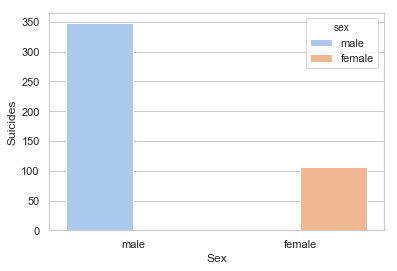

In [39]:
ax = sns.barplot(x="sex", 
            y="suicides_no", 
            hue="sex",
            ci=None,
            data=df)
ax.set(xlabel='Sex', ylabel='Suicides')
plt.savefig('Number of Suicides by Sex')
plt.show()

In [40]:
group1 = df[df["sex"] == "male"]["suicides_no"]
group2 = df[df["sex"] == "female"]["suicides_no"]

In [41]:
import scipy.stats as stats
stats.f_oneway(group1,group2)

F_onewayResult(statistic=21.167697122596426, pvalue=4.905864123280245e-06)

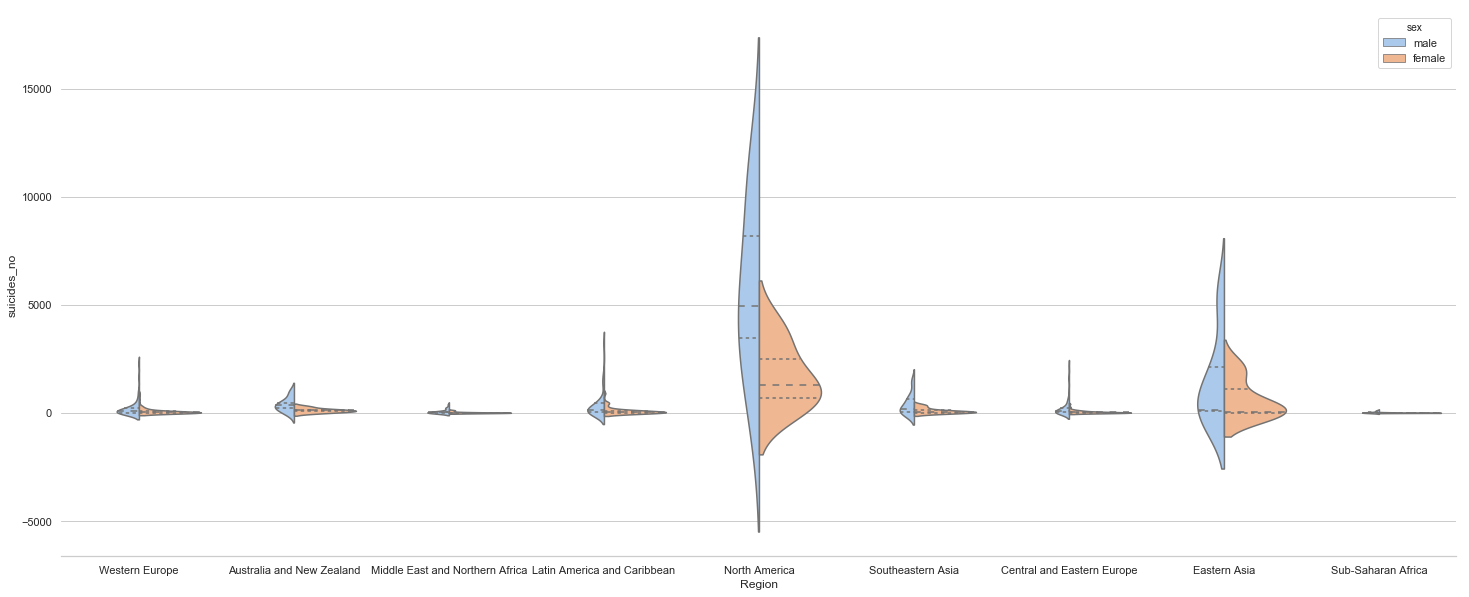

In [43]:
sns.set(style="whitegrid", palette="pastel", color_codes=True)
plt.figure(figsize=(25,10))

# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="Region", 
               y="suicides_no", 
               hue="sex",
               split=True, 
                inner="quart",
               data=df)
sns.despine(left=True)

In [44]:
data_df = data_2015.groupby(by = 'Country')[['suicides_no','population']].sum()
data_df.head()

data2_df = data_2015.groupby(by = 'Country')[['Happiness Score']].mean()
data2_df.head()

data_merge = pd.merge(data_df,data2_df,left_index=True, right_index=True)
data_merge["Suicide Rate Per Capital"]=""
data_merge.head()

data3 = data_merge["suicides_no"]
data3.head()

data4 = data_merge["population"]
data4.head()

data5 = data_merge["Happiness Score"]
data5.head()

Country
Argentina    6.574
Armenia      4.350
Australia    7.284
Austria      7.200
Belgium      6.937
Name: Happiness Score, dtype: float64

In [45]:
country_to_region = dict(zip(data_2015.Country, data_2015.Region))

data_merge['Suicide Rate Per Capital'] = data_merge['suicides_no'] / data_merge['population']
data_merge = data_merge.reset_index()
data_merge['Region'] = data_merge['Country'].map(country_to_region)
data_merge

x = np.array(data_merge['Happiness Score']).astype(float)
y = np.array(data_merge['Suicide Rate Per Capital']).astype(float)
np.corrcoef(x, y)

array([[1.        , 0.03526194],
       [0.03526194, 1.        ]])

[(-0.0001, 0.0003)]

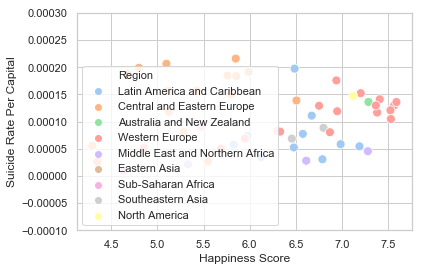

In [46]:
ax = sns.scatterplot(x="Happiness Score", y="Suicide Rate Per Capital",
                      hue="Region", data=data_merge,s=80)
sns.set(rc={'figure.figsize':(20.7,10.27)})
ax.set(ylim=(-.0001,.0003))

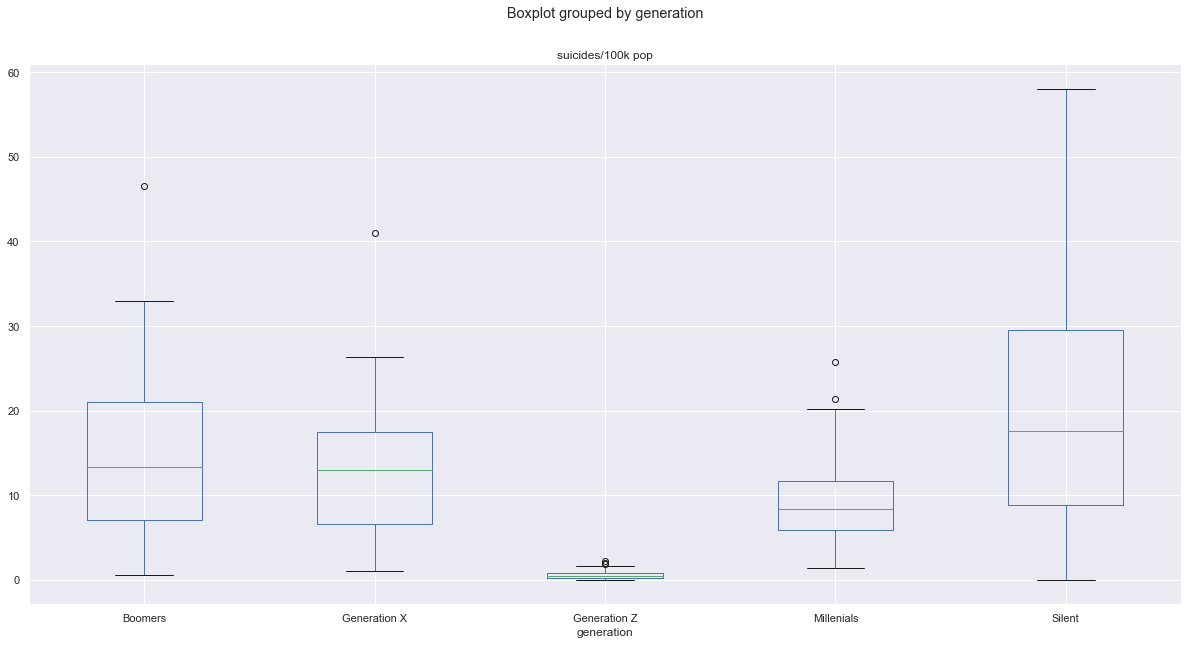

In [48]:
data_df2 = data_2015.groupby(by = ['Country','generation'])['suicides/100k pop'].mean()
data_df2 = data_df2.reset_index()
data_df2
data_df2.boxplot("suicides/100k pop", by="generation", figsize=(20, 10))

In [49]:
group1 = df[df["generation"] == "Boomers"]["suicides/100k pop"]
group2 = df[df["generation"] == "Generation X"]["suicides/100k pop"]
group3 = df[df["generation"] == "Generation Z"]["suicides/100k pop"]
group4 = df[df["generation"] == "Millenials"]["suicides/100k pop"]
group5 = df[df["generation"] == "Silent"]["suicides/100k pop"]

In [51]:
import scipy.stats as stats
stats.f_oneway(group1, group2, group3, group4, group5)

from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
mc = MultiComparison(df['suicides/100k pop'], df['generation'])
result = mc.tukeyhsd()
print(result)
print(mc.groupsunique)

    Multiple Comparison of Means - Tukey HSD,FWER=0.05   
   group1       group2    meandiff  lower   upper  reject
---------------------------------------------------------
  Boomers    Generation X  -1.73   -6.2725  2.8125 False 
  Boomers    Generation Z -14.2657 -19.119 -9.4124  True 
  Boomers     Millenials  -5.6258  -9.5598 -1.6919  True 
  Boomers       Silent     6.0351   1.4926 10.5776  True 
Generation X Generation Z -12.5357 -17.389 -7.6824  True 
Generation X  Millenials  -3.8958  -7.8298  0.0381 False 
Generation X    Silent     7.7651   3.2226 12.3076  True 
Generation Z  Millenials   8.6398   4.3508 12.9289  True 
Generation Z    Silent    20.3008  15.4475 25.1541  True 
 Millenials     Silent    11.6609   7.727  15.5948  True 
---------------------------------------------------------
['Boomers' 'Generation X' 'Generation Z' 'Millenials' 'Silent']


In [88]:
data_merge2 = pd.merge(data2016_df,data20162_df,left_index=True, right_index=True)
data_merge2["Suicide Rate Per Capital"]=""
data_merge2.head()

,suicides_no,population,Happiness Score,Suicide Rate Per Capital
Country,,,,
Armenia,67,2400033,4.360,
Austria,1201,7484629,7.119,
Croatia,683,3567043,5.488,
Cyprus,36,711344,5.546,
Czech Republic,1318,8929942,6.596,


In [55]:
country_to_region2 = dict(zip(data_2016.Country, data_2016.Region))

In [57]:
data_merge2['Suicide Rate Per Capital'] = data_merge2['suicides_no'] / data_merge2['population']
data_merge2 = data_merge.reset_index()
data_merge2['Region'] = data_merge['Country'].map(country_to_region)
data_merge2

,index,Country,suicides_no,population,Happiness Score,Suicide Rate Per Capital,Region
0,0,Argentina,3073,39699624,6.574,0.000077,Latin America and Caribbean
1,1,Armenia,74,2795335,4.350,0.000026,Central and Eastern Europe
2,2,Australia,3027,22240785,7.284,0.000136,Australia and New Zealand
3,3,Austria,1251,8219386,7.200,0.000152,Western Europe
4,4,Belgium,1867,10624356,6.937,0.000176,Western Europe
5,5,Brazil,11163,191087085,6.983,0.000058,Latin America and Caribbean
6,6,Chile,1838,16565725,6.670,0.000111,Latin America and Caribbean
7,7,Colombia,2332,44490427,6.477,0.000052,Latin America and Caribbean
8,8,Croatia,739,4001669,5.759,0.000185,Central and Eastern Europe
9,9,Cyprus,40,796037,5.689,0.000050,Western Europe


In [59]:
x = np.array(data_merge2['Happiness Score']).astype(float)
y = np.array(data_merge2['Suicide Rate Per Capital']).astype(float)
np.corrcoef(x, y)

array([[1.        , 0.03526194],
       [0.03526194, 1.        ]])

[(-0.0001, 0.0003)]

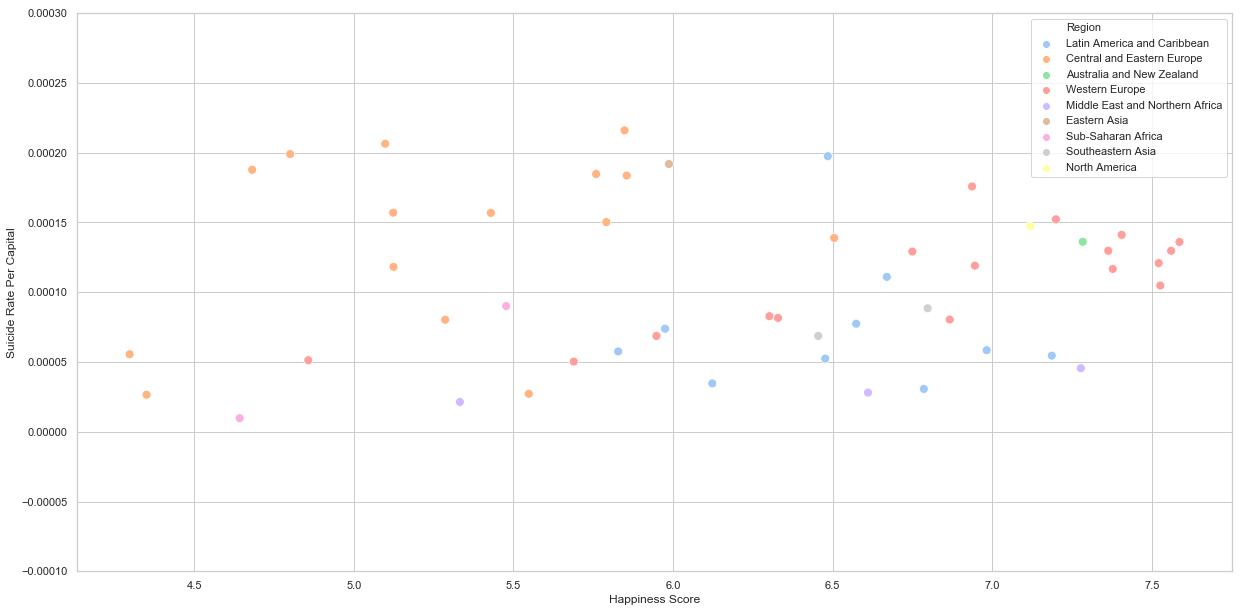

In [68]:
ax = sns.scatterplot(x="Happiness Score", y="Suicide Rate Per Capital",
                      hue="Region", data=data_merge2, s=80)
sns.set(rc={'figure.figsize':(20.7,10.27)})
ax.set(ylim=(-.0001,.0003))

In [62]:
data_df3 = data_2016.groupby(by = ['Country','generation'])['suicides/100k pop'].mean()
data_df3 = data_df3.reset_index()
data_df3

,Country,generation,suicides/100k pop
0,Armenia,Boomers,4.3400
1,Armenia,Generation X,2.6500
2,Armenia,Millenials,1.3150
3,Armenia,Silent,10.6600
4,Austria,Boomers,20.5150
5,Austria,Generation X,13.8750
6,Austria,Millenials,8.2000
7,Austria,Silent,40.8250
8,Croatia,Boomers,25.7250
9,Croatia,Generation X,16.9050


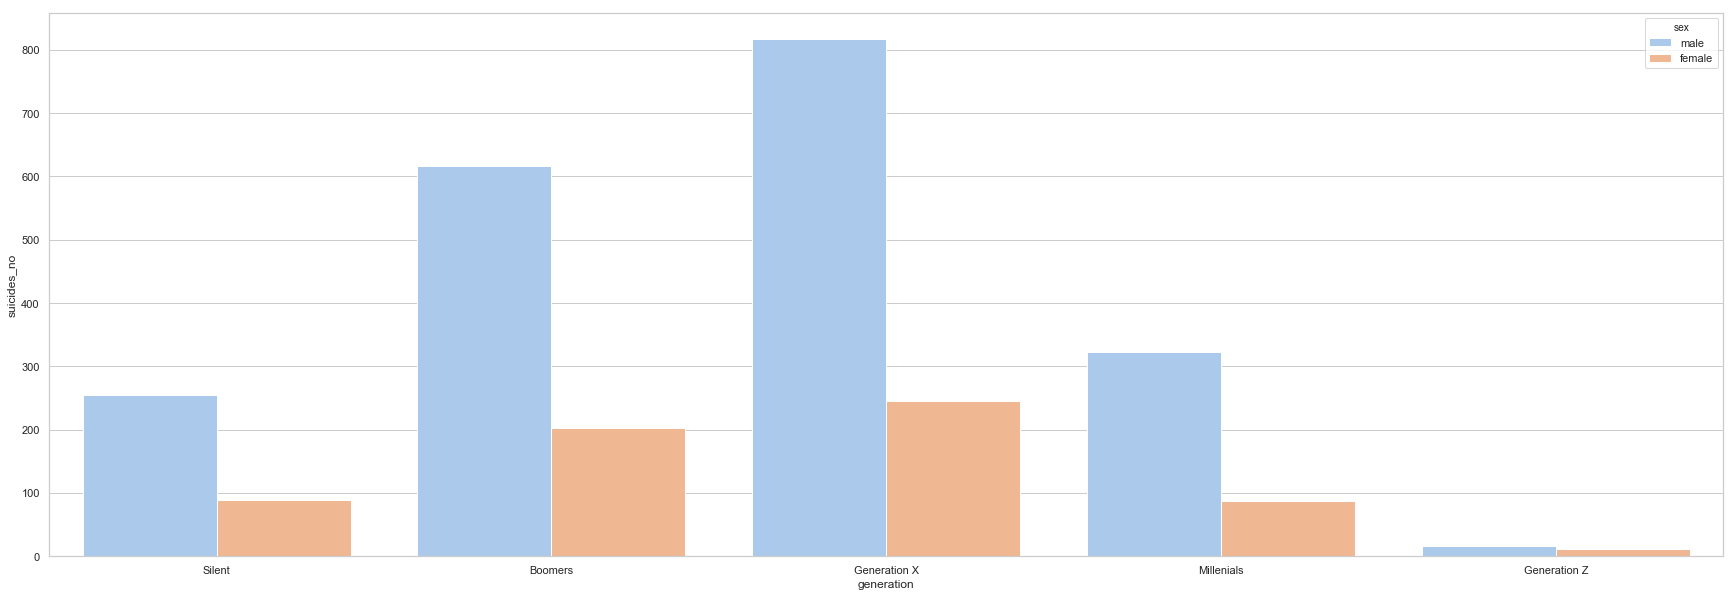

In [67]:
sns.set(style="whitegrid", palette="pastel", color_codes=True)
plt.figure(figsize=(30,10))

ax = sns.barplot(x="generation", 
            y="suicides_no", 
            hue="sex",
            ci=None,
            data=data_2015)

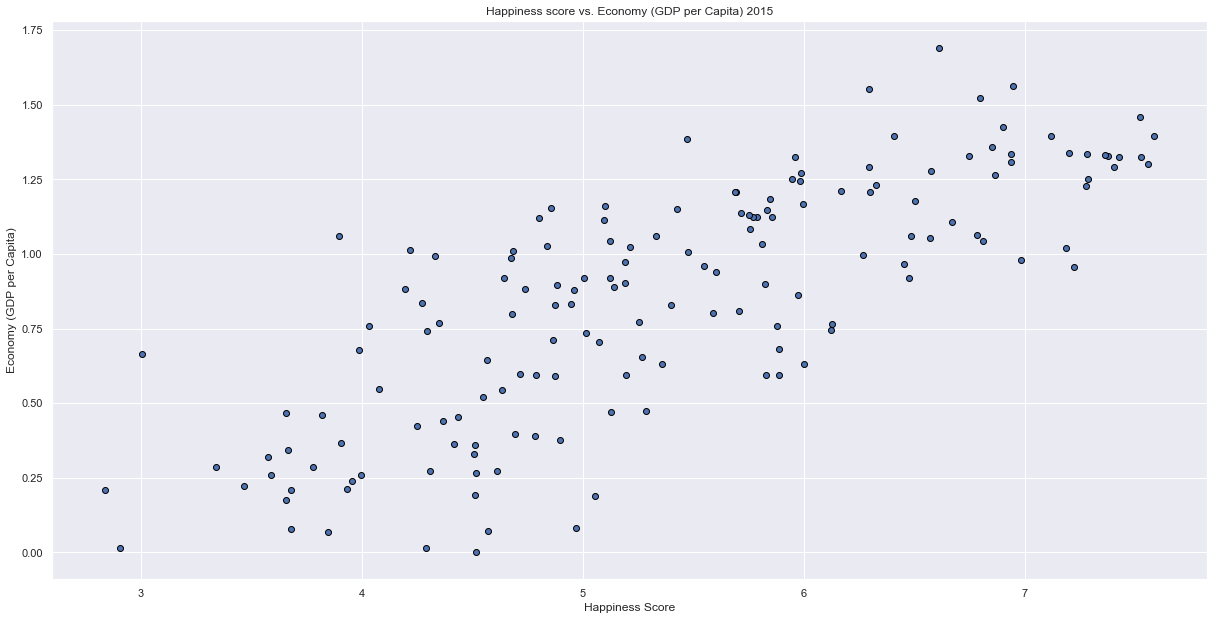

In [83]:
# Build a scatter plot for each data type
plt.scatter(world_happiness_2015["Happiness Score"], world_happiness_2015["Economy (GDP per Capita)"], 
            marker="o", edgecolor="black")
# Incorporate the other graph properties
plt.title("Happiness score vs. Economy (GDP per Capita) 2015")
plt.ylabel("Economy (GDP per Capita)")
plt.xlabel("Happiness Score")
plt.grid(True)

# Save the figure
#plt.savefig("Output_Plots/Happiness_Score_vs_GDP_per_Capita_2015.png")

# Show plot
plt.show()

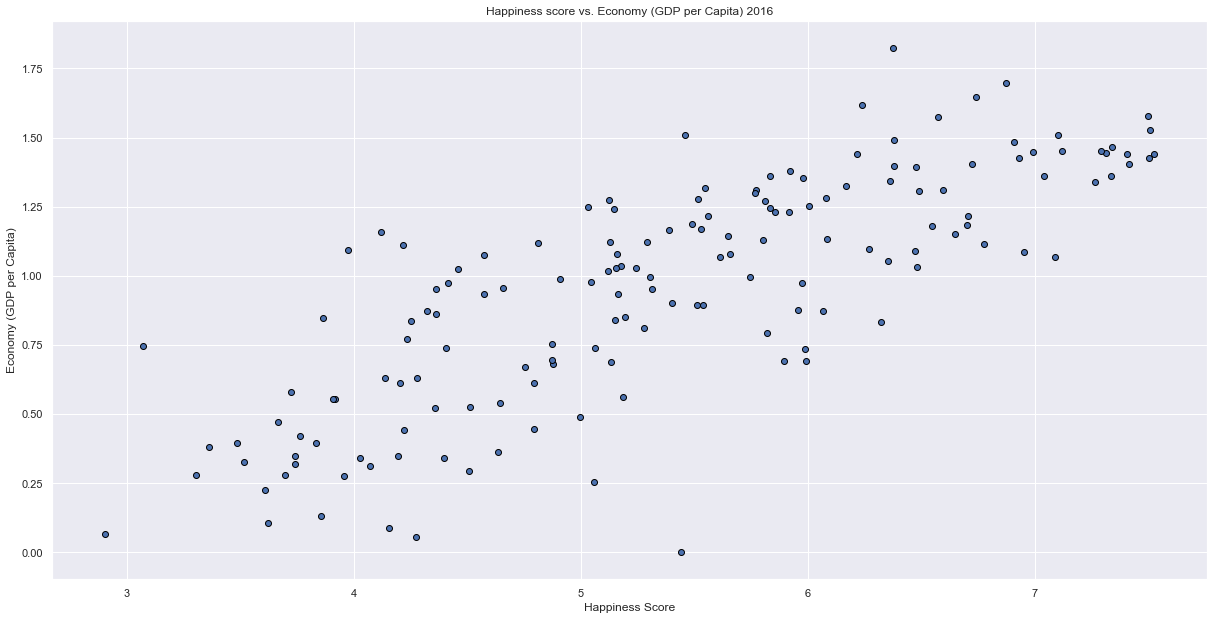

In [82]:
# Build a scatter plot for each data type
plt.scatter(world_happiness_2016["Happiness Score"], world_happiness_2016["Economy (GDP per Capita)"], 
            marker="o", edgecolor="black")
# Incorporate the other graph properties
plt.title("Happiness score vs. Economy (GDP per Capita) 2016")
plt.ylabel("Economy (GDP per Capita)")
plt.xlabel("Happiness Score")
plt.grid(True)

# Save the figure
#plt.savefig("Output_Plots/Happiness_Score_vs_GDP_per_Capita_2016.png")

# Show plot
plt.show()

In [80]:
# Filter the DataFrame down only to those columns to chart
country_and_gdp = df[["Trust (Government Corruption)", "Country","Economy (GDP per Capita)","Happiness Score"]]

# Set the index to be "State" so they will be used as labels
country_and_gdp = country_and_gdp.set_index("Country")

country_and_gdp.head()

,Trust (Government Corruption),Economy (GDP per Capita),Happiness Score
Country,,,
Switzerland,0.41978,1.39651,7.587
Switzerland,0.41978,1.39651,7.587
Switzerland,0.41978,1.39651,7.587
Switzerland,0.41978,1.39651,7.587
Switzerland,0.41978,1.39651,7.587


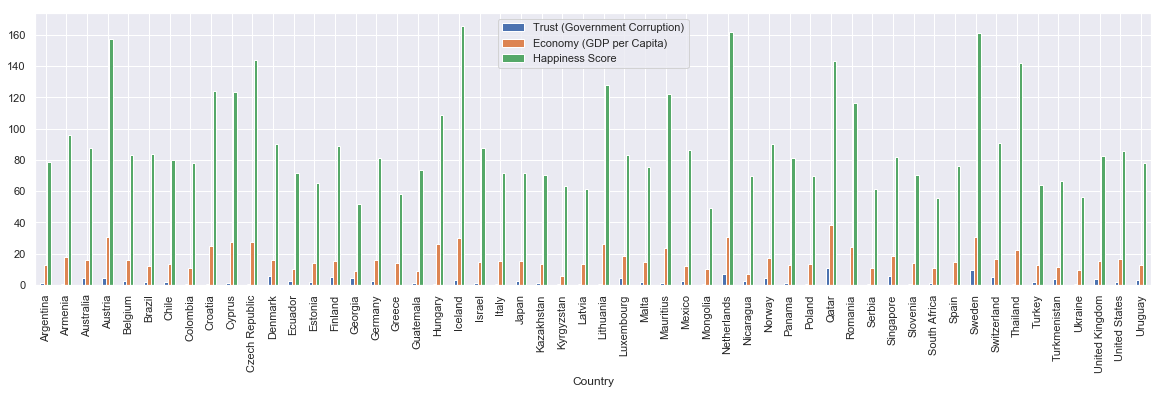

<Figure size 1490.4x739.44 with 0 Axes>

In [81]:
# Group by Region
country_groupped = country_and_gdp.groupby(["Country"])
gdp_sum = country_groupped["Trust (Government Corruption)", "Economy (GDP per Capita)", "Happiness Score"].sum()

# Pandas can also plot multiple columns if the DataFrame includes them
multi_plot = gdp_sum.plot(kind="bar", figsize=(20,5))

plt.show()
#plt.savefig("Output_Plots/Correlattion_between_Government_Trust_GDP_Happiness_Score.png")
plt.tight_layout()

In [84]:
x = np.array(world_happiness_2015["Happiness Score"]).astype(float)
y = np.array(world_happiness_2015["Economy (GDP per Capita)"]).astype(float)
np.corrcoef(x, y)

array([[1.        , 0.78096553],
       [0.78096553, 1.        ]])

In [85]:
x = np.array(world_happiness_2016["Happiness Score"]).astype(float)
y = np.array(world_happiness_2016["Economy (GDP per Capita)"]).astype(float)
np.corrcoef(x, y)

array([[1.        , 0.79032202],
       [0.79032202, 1.        ]])